In [1]:
import os
import sys
import webbrowser
import pandas as pd
import yahoo_fin.stock_info as si
import statsmodels.api as sm
'''
from statsmodels.iolib.summary2 import summary_col
'''
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings

In [2]:
# check default working directory >>>
print('/nWorking directory:/nold path -> ', os.getcwd() )

# put your working directory path here !!! >>
path1=r"C:/Users/mixas/trading_capm/path1"
# paths in HSE >>>
path2=r"C:/Users/mixas/trading_capm/path2"
path3=r"C:/Users/mixas/trading_capm/path3"

# change working directory >>
try:
  os.chdir(path1)
except FileNotFoundError:
  try:
    os.chdir(path2)
  except FileNotFoundError:
    os.chdir(path3)

print('new path -> ', os.getcwd() )
#%%
# path to my modules >>
my_lib_path=os.getcwd() + r"/my_lib"

# add path to sys.path list >>
sys.path.append(my_lib_path)

print('/nList of module paths:')
display(sys.path)

/nWorking directory:/nold path ->  C:\Users\mixas\trading_capm
new path ->  C:\Users\mixas\trading_capm\path1
/nList of module paths:


['C:\\Users\\mixas\\trading_capm',
 'C:\\Users\\mixas\\anaconda3\\python311.zip',
 'C:\\Users\\mixas\\anaconda3\\DLLs',
 'C:\\Users\\mixas\\anaconda3\\Lib',
 'C:\\Users\\mixas\\anaconda3',
 '',
 'C:\\Users\\mixas\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\mixas\\anaconda3\\Lib\\site-packages',
 'C:\\Users\\mixas\\anaconda3\\Lib\\site-packages\\win32',
 'C:\\Users\\mixas\\anaconda3\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\mixas\\anaconda3\\Lib\\site-packages\\Pythonwin',
 'C:\\Users\\mixas\\trading_capm\\path1/my_lib']

In [3]:
# load function located in "my_lib_path" >>>
from my_summary_col import summary_col

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2016-04-11 to 2021-04-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tbill   1251 non-null   float64
dtypes: float64(1)
memory usage: 19.5 KB


None


T-Bill from 2016-04-11 00:00:00  to 2021-04-09 00:00:00


<Axes: xlabel='date'>

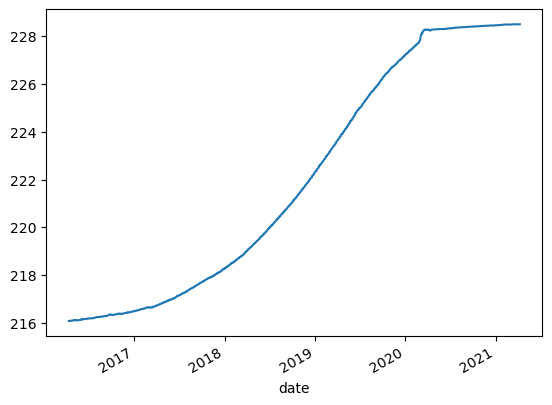

In [6]:
# read T-Bill data
tb = pd.read_excel('3mT-bill_.xlsx', index_col=0)
'''
tb = pd.read_csv(fileName +'.csv', delimiter=';')
tb['date'] = pd.to_datetime(tb['date'], format="%d.%m.%Y")
tb = tb.set_index('date')
'''
display(tb.info())
'''
tb['tbill']=tb.astype(float)
'''
s = tb.index.min()
e = tb.index.max()
print('\nT-Bill from',s,' to',e)
tb['tbill'].plot()

date
2016-04-11         NaN
2016-04-12    0.000000
2016-04-13    0.000000
2016-04-14    0.000000
2016-04-15    0.000046
                ...   
2021-04-05    0.000000
2021-04-06    0.000000
2021-04-07    0.000000
2021-04-08    0.000000
2021-04-09    0.000000
Name: rf, Length: 1251, dtype: float64

<Axes: xlabel='date'>

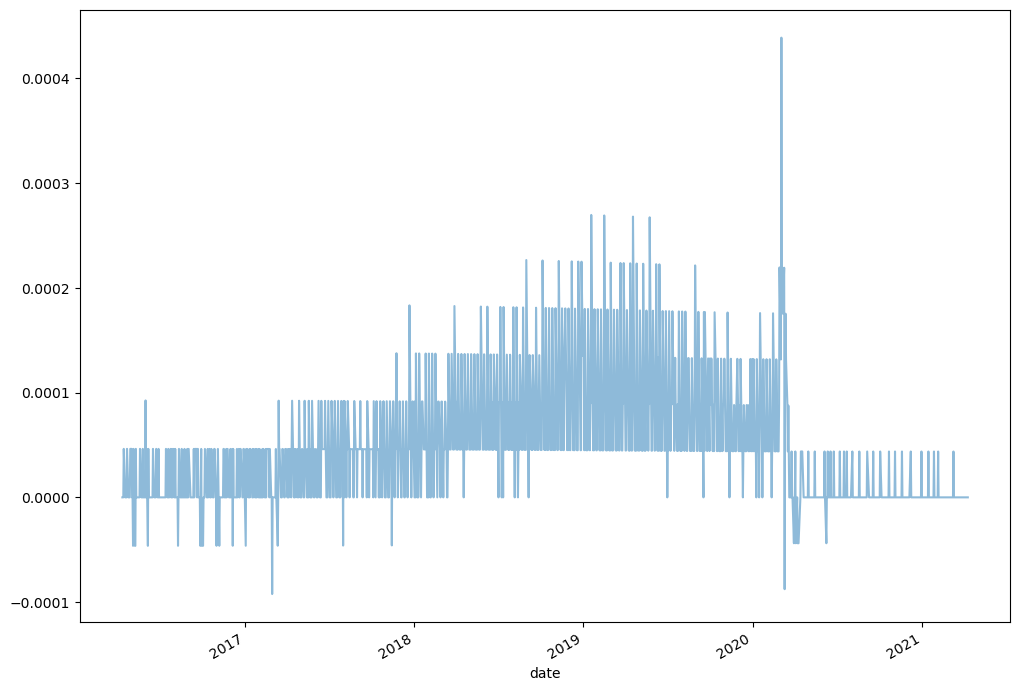

In [7]:
# returns >>>
tb['rf'] = tb['tbill'].pct_change()

display(tb.rf)

tb.rf.plot(alpha=0.5, figsize=(12,9))

SPY NVDA DELL 

<Axes: >

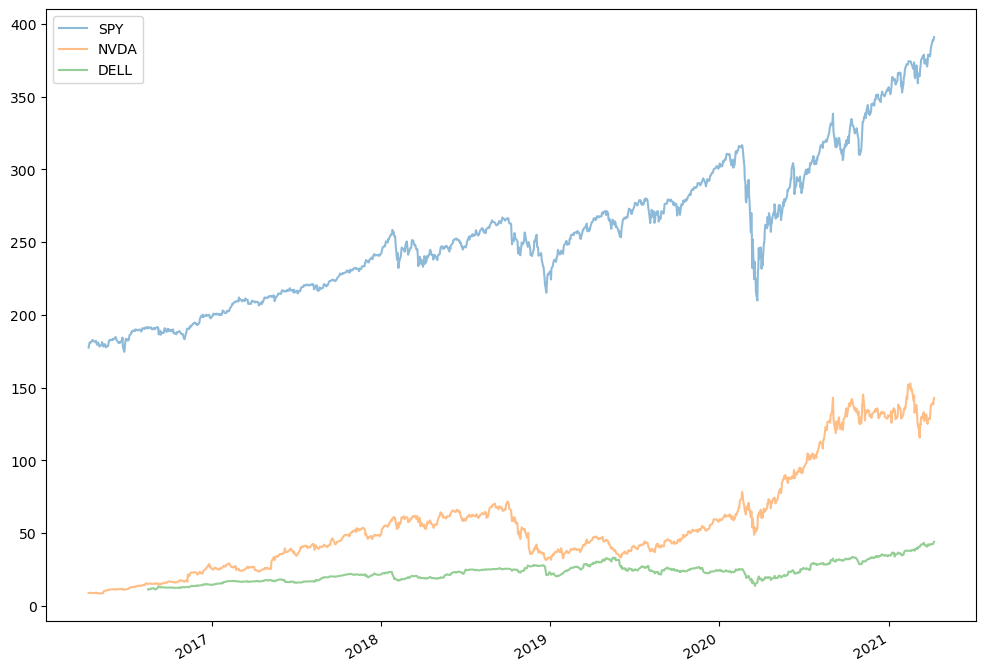

In [49]:
assets = ['SPY', 'NVDA', 'DELL']

data=pd.DataFrame()

for i in assets:
 print(i, end=" ")
 tmp=si.get_data(i, start_date=s, end_date=e)
 data[i]=tmp['adjclose']

data.plot(alpha=0.5, figsize=(12,9))

,SPY,NVDA,DELL
2016-04-11,NaN,NaN,NaN
2016-04-12,0.009313,-0.001115,NaN
2016-04-13,0.010101,0.025111,NaN
2016-04-14,0.000048,0.002722,NaN
2016-04-15,-0.001106,0.007872,NaN
...,...,...,...
2021-04-01,0.010799,0.034724,0.010550
2021-04-05,0.014353,0.012724,0.003143
2021-04-06,-0.000591,-0.009008,0.001343
2021-04-07,0.001158,0.020344,0.022687


<Axes: >

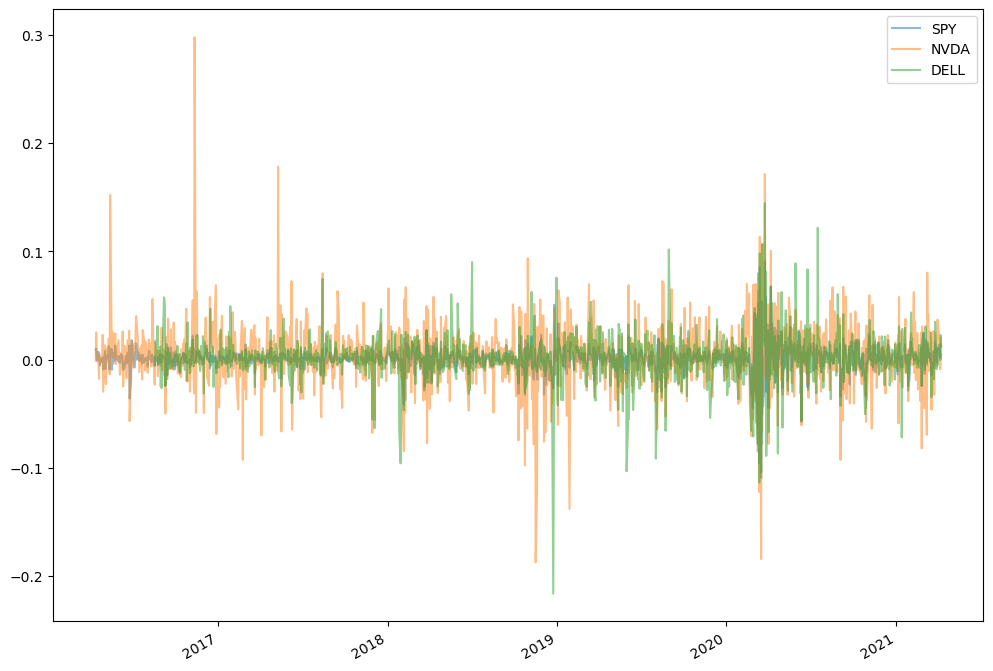

In [50]:
# returns >>>
Y = data[assets].pct_change()

display(Y)

Y.plot(alpha=0.5, figsize=(12,9))

'SPY'

'NVDA'

'DELL'

,pSPY,pNVDA,pDELL
2016-04-11,NaN,NaN,NaN
2016-04-12,0.009313,-0.001115,NaN
2016-04-13,0.010101,0.025111,NaN
2016-04-14,0.000048,0.002722,NaN
2016-04-15,-0.001152,0.007825,NaN
...,...,...,...
2021-04-05,0.014353,0.012724,0.003143
2021-04-06,-0.000591,-0.009008,0.001343
2021-04-07,0.001158,0.020344,0.022687
2021-04-08,0.004747,0.012267,0.011693


<Axes: >

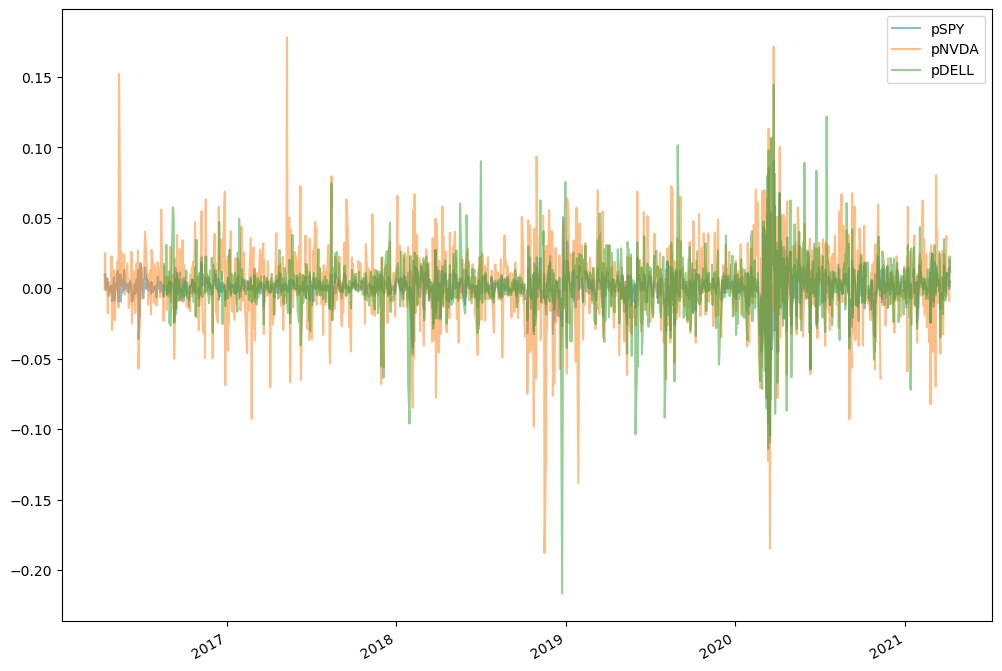

In [51]:
df=pd.DataFrame()

# market & risk premium
for i in assets:
 display(i)
 n = 'p'+i    # <- new column name
 df[n]=Y[i]-tb.rf

display(df)

df.plot(alpha=0.5, figsize=(12,9))

In [52]:
### OLS >>>
reg1 = sm.OLS(df.iloc[:,1], df.iloc[:,0], missing='drop').fit()
'''
# view results >>
print(reg1.summary())
'''

### OLS >>>
reg2 = sm.OLS(df.iloc[:,2], df.iloc[:,0], missing='drop').fit()

In [53]:
info_dict={'Observations' : lambda x: f"{int(x.nobs):d}",
        'R-sq.' : lambda x: f"{x.rsquared:.3f}",
        'F' : lambda x: f"{x.fvalue:.1f}",
        'F p-value' : lambda x: f"{x.f_pvalue:.3f}"}
results_table = summary_col(results=[reg1,reg2],
                 float_format='%0.2f',
                 stars = True,
                 model_names=assets[1:],
                 info_dict=info_dict)
results_table.add_title('CAPM: OLS Regressions')
print(results_table)

   CAPM: OLS Regressions
               NVDA    DELL 
----------------------------
pSPY         1.57*** 1.09***
             (0.05)  (0.04) 
Observations 1248    1158   
R-sq.        0.408   0.341  
F            857.8   599.6  
F p-value    0.000   0.000  
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


In [54]:
# add constant in model >>
df['const'] = 1

# What about *alpha* ?
expl=df[['pSPY', 'const']]

### OLS ### >>
reg1_ = sm.OLS(df.iloc[:,1], expl, missing='drop').fit()
reg2_ = sm.OLS(df.iloc[:,2], expl, missing='drop').fit()

results_table = summary_col(results=[reg1,reg2,reg1_,reg2_],
                 float_format='%0.5f',
                 stars = True,
                 model_names=assets[1:]+assets[1:],
                 info_dict=info_dict)
results_table.add_title('OLS Regressions')
print(results_table)

                    OLS Regressions
               NVDA I     DELL I    NVDA II    DELL II  
--------------------------------------------------------
const                              0.00137**  0.00068   
                                   (0.00063)  (0.00054) 
pSPY         1.56751*** 1.09419*** 1.56111*** 1.09123***
             (0.05352)  (0.04469)  (0.05352)  (0.04474) 
Observations 1248       1158       1248       1158      
R-sq.        0.408      0.341      0.406      0.340     
F            857.8      599.6      850.7      595.0     
F p-value    0.000      0.000      0.000      0.000     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [39]:
webbrowser.open("https://finance.yahoo.com/quote/AMD")
webbrowser.open("https://finance.yahoo.com/quote/NVDA")
webbrowser.open("https://finance.yahoo.com/quote/DELL")

True

date
2016-04-11         NaN
2016-04-12    0.000000
2016-04-13    0.000000
2016-04-14    0.000000
2016-04-15    0.000046
                ...   
2021-04-05    0.000000
2021-04-06    0.000000
2021-04-07    0.000000
2021-04-08    0.000000
2021-04-09    0.000000
Name: rf, Length: 1251, dtype: float64

date
2016-04-30    0.000139
2016-05-31    0.000093
2016-06-30    0.000278
2016-07-31    0.000185
2016-08-31    0.000231
                ...   
2020-12-31    0.000088
2021-01-31    0.000088
2021-02-28    0.000044
2021-03-31    0.000044
2021-04-30    0.000000
Freq: M, Name: rf, Length: 61, dtype: float64

<Axes: xlabel='date'>

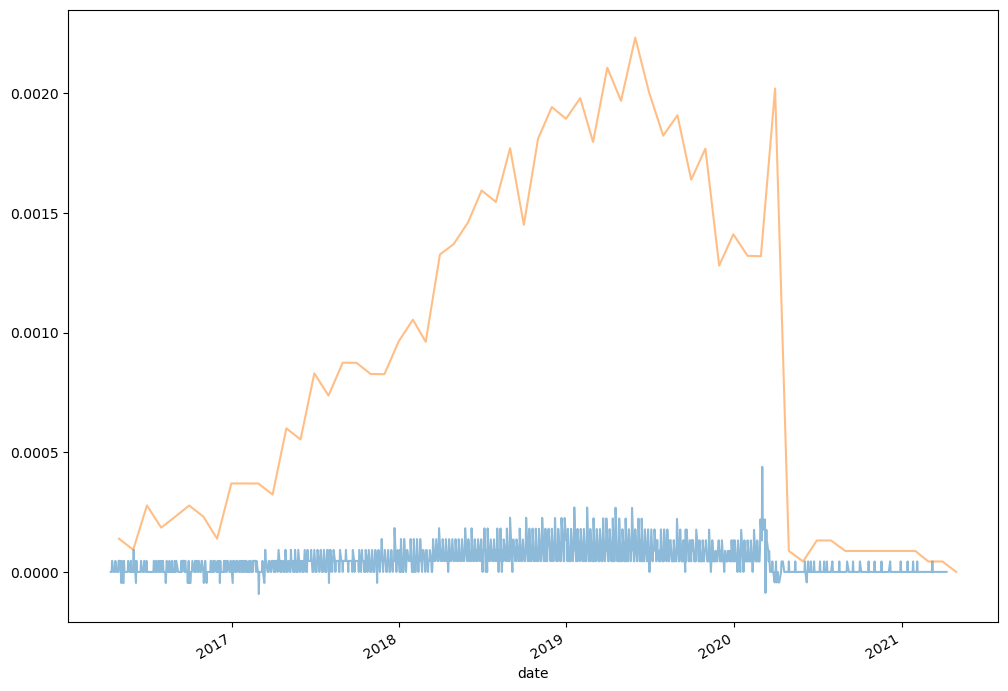

In [55]:
display(tb.rf)

tb.rf.plot(alpha=0.5, figsize=(12,9))

# resample from daily returns to monthly returns
tbm=tb['rf'].resample("M").apply(lambda x: ((x + 1).cumprod() - 1).last("D"))

display(tbm)

tbm.plot(alpha=0.5, figsize=(12,9))

,SPY,NVDA,DELL
2016-04-11,NaN,NaN,NaN
2016-04-12,0.009313,-0.001115,NaN
2016-04-13,0.010101,0.025111,NaN
2016-04-14,0.000048,0.002722,NaN
2016-04-15,-0.001106,0.007872,NaN
...,...,...,...
2021-04-01,0.010799,0.034724,0.010550
2021-04-05,0.014353,0.012724,0.003143
2021-04-06,-0.000591,-0.009008,0.001343
2021-04-07,0.001158,0.020344,0.022687


<Axes: >

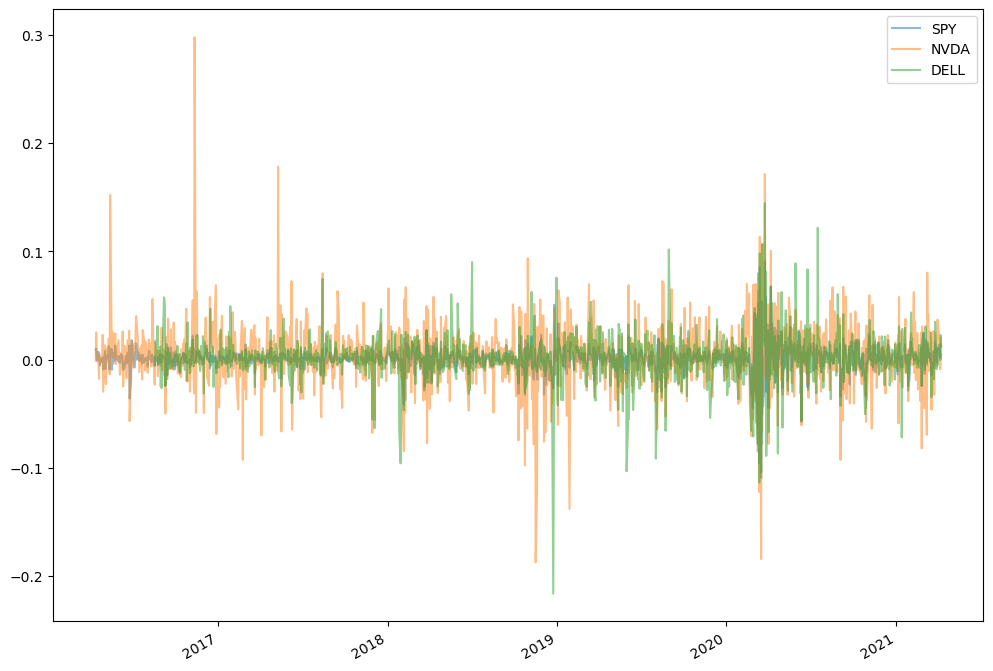

In [56]:
display(Y)

Y.plot(alpha=0.5, figsize=(12,9))



,SPY,NVDA,DELL
2016-04-30,0.011322,-0.009755,NaN
2016-05-31,0.017012,0.318360,NaN
2016-06-30,0.003476,0.006207,NaN
2016-07-31,0.036472,0.214635,NaN
2016-08-31,0.001198,0.076236,0.039070
...,...,...,...
2020-12-31,0.037048,-0.025567,0.061713
2021-01-31,-0.010190,-0.004998,-0.005458
2021-02-28,0.027805,0.055794,0.112224
2021-03-31,0.045399,-0.026370,0.087332


<Axes: >

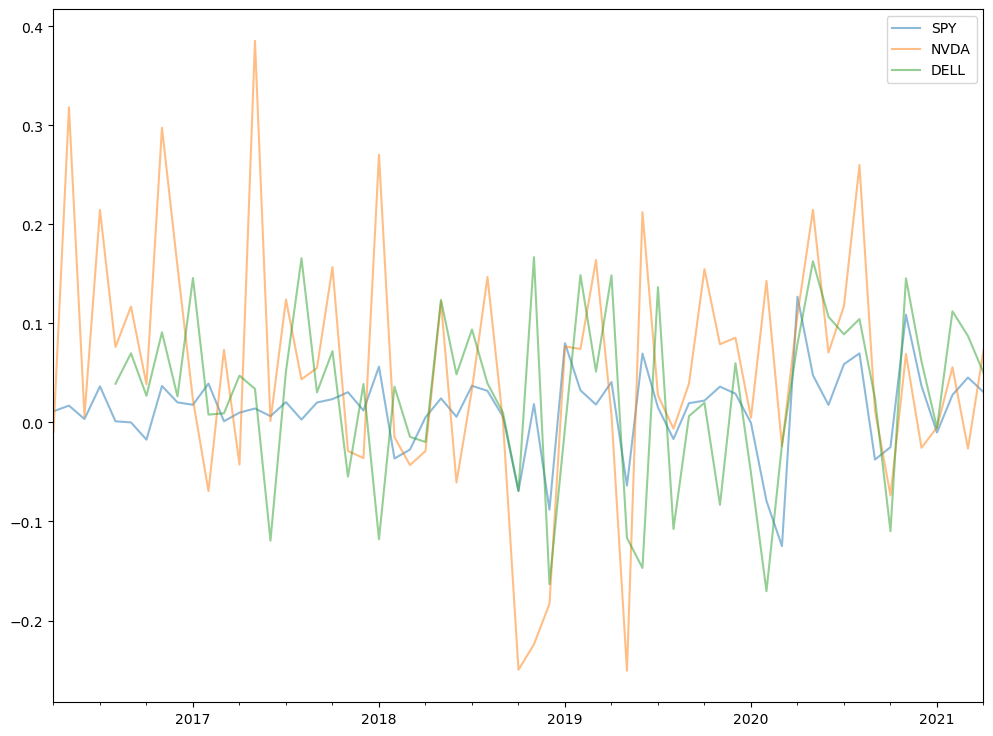

In [57]:
# resample from daily returns to monthly returns
Ym=Y.resample("M").apply(lambda x: ((x + 1).cumprod() - 1).last("D"))

display(Ym)

Ym.plot(alpha=0.5, figsize=(12,9))

'SPY'

'NVDA'

'DELL'

,pSPY,pNVDA,pDELL
2016-04-30,0.011184,-0.009894,NaN
2016-05-31,0.016919,0.318267,NaN
2016-06-30,0.003198,0.005929,NaN
2016-07-31,0.036287,0.214450,NaN
2016-08-31,0.000966,0.076004,0.038839
...,...,...,...
2020-12-31,0.036961,-0.025655,0.061625
2021-01-31,-0.010278,-0.005086,-0.005545
2021-02-28,0.027762,0.055750,0.112180
2021-03-31,0.045356,-0.026413,0.087288


<Axes: >

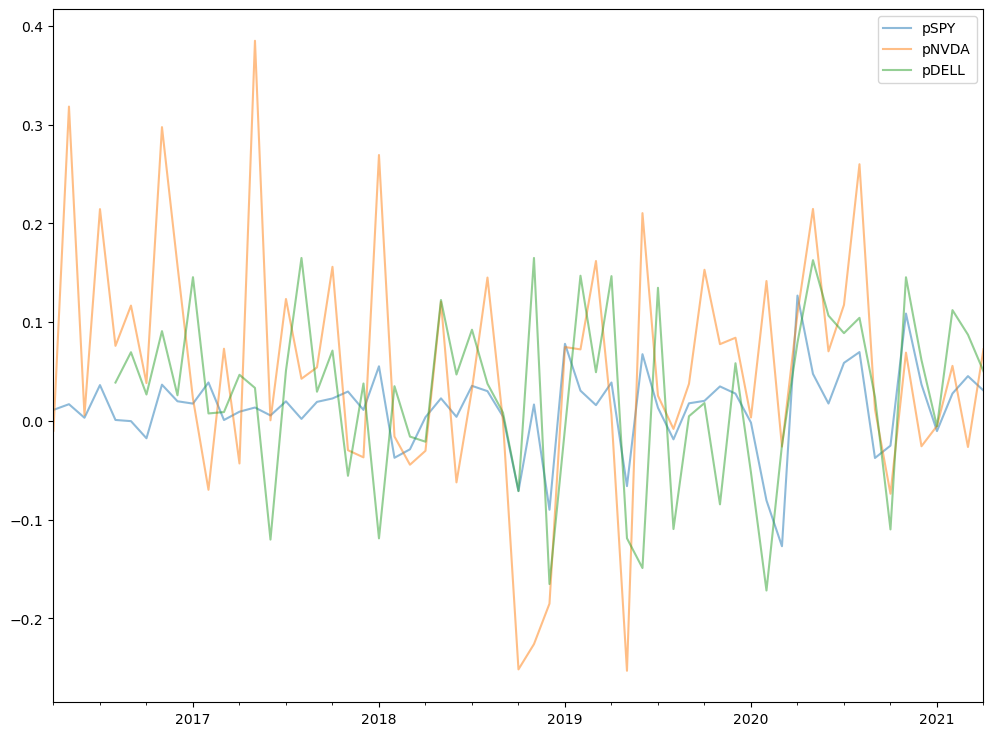

In [58]:
df=pd.DataFrame()

# market & risk premium
for i in assets:
 display(i)
 n = 'p'+i    # <- column name
 df[n]=Ym[i]-tbm

display(df)

df.plot(alpha=0.5, figsize=(12,9))

In [59]:
### OLS ### >>
reg1 = sm.OLS(df.iloc[:,1], df.iloc[:,0], missing='drop').fit()
reg2 = sm.OLS(df.iloc[:,2], df.iloc[:,0], missing='drop').fit()

# add constant in model >>
df['const'] = 1

expl=df[['pSPY', 'const']]

reg1_ = sm.OLS(df.iloc[:,1], expl, missing='drop').fit()
reg2_ = sm.OLS(df.iloc[:,2], expl, missing='drop').fit()
reg2_.summary()

results_table = summary_col(results=[reg1,reg2,reg1_,reg2_],
                 float_format='%0.3f',
                 stars = True,
                 model_names=assets[1:]+assets[1:],
                 info_dict=info_dict)
results_table.add_title('OLS Regressions')
print(results_table)

                OLS Regressions
              NVDA I   DELL I  NVDA II  DELL II 
------------------------------------------------
const                          0.035**  0.015   
                               (0.015)  (0.011) 
pSPY         1.628*** 1.023*** 1.394*** 0.930***
             (0.336)  (0.232)  (0.339)  (0.240) 
Observations 61       57       61       57      
R-sq.        0.282    0.258    0.223    0.215   
F            23.5     19.5     16.9     15.1    
F p-value    0.000    0.000    0.000    0.000   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [45]:
# frame.append is deprecated (see below...) >>
# filter of warnings >>
warnings.warn("deprecated", DeprecationWarning)
# disable warnings >>
warnings.simplefilter("ignore")
'''
# Or if you are using > Python 3.11:
with warnings.catch_warnings(action="ignore"):
    fxn()
'''

'''
print('\nyahoo_fin.stock_info\n Beta (5Y Monthly) >>>\nAAPL:',
      si.get_quote_table('AAPL',
                         dict_result = True).get('Beta (5Y Monthly)'),
      '\nGME:',
      si.get_quote_table('GME',
                         dict_result = True).get('Beta (5Y Monthly)'))
'''
webbrowser.open("https://finance.yahoo.com/quote/AMD")
webbrowser.open("https://finance.yahoo.com/quote/NVDA")
webbrowser.open("https://finance.yahoo.com/quote/DELL")

warnings.simplefilter('default')

C:\Users\mixas\AppData\Local\Temp\ipykernel_25316\12226192.py:3: DeprecationWarning: deprecated
  warnings.warn("deprecated", DeprecationWarning)


In [60]:
# You need not to subtract risk-free rate
Ym['const'] = 1
expl2=Ym[['SPY', 'const']]

o1 = sm.OLS(Ym.iloc[:,1], expl2, missing='drop').fit()
o2 = sm.OLS(Ym.iloc[:,2], expl2, missing='drop').fit()

results_table = summary_col(results=[reg1,reg2,reg1_,reg2_,o1,o2],
                 float_format='%0.2f',
                 stars = True,
                 model_names=assets[1:]+assets[1:]+assets[1:],
                 info_dict=info_dict)
results_table.add_title('OLS Regressions')
print(results_table)

                       OLS Regressions
              NVDA I  DELL I NVDA II DELL II NVDA III DELL III
--------------------------------------------------------------
SPY                                          1.39***  0.92*** 
                                             (0.34)   (0.24)  
const                        0.04**  0.02    0.03**   0.02    
                             (0.01)  (0.01)  (0.02)   (0.01)  
pSPY         1.63*** 1.02*** 1.39*** 0.93***                  
             (0.34)  (0.23)  (0.34)  (0.24)                   
Observations 61      57      61      57      61       57      
R-sq.        0.282   0.258   0.223   0.215   0.219    0.211   
F            23.5    19.5    16.9    15.1    16.6     14.7    
F p-value    0.000   0.000   0.000   0.000   0.000    0.000   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


(-0.5, 915.5, 893.5, -0.5)

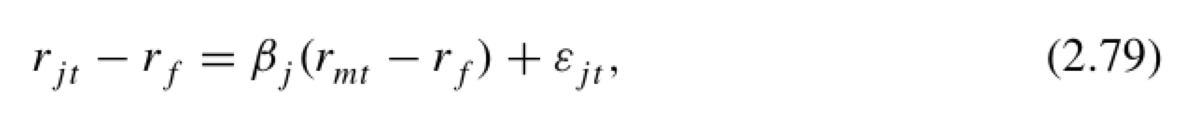

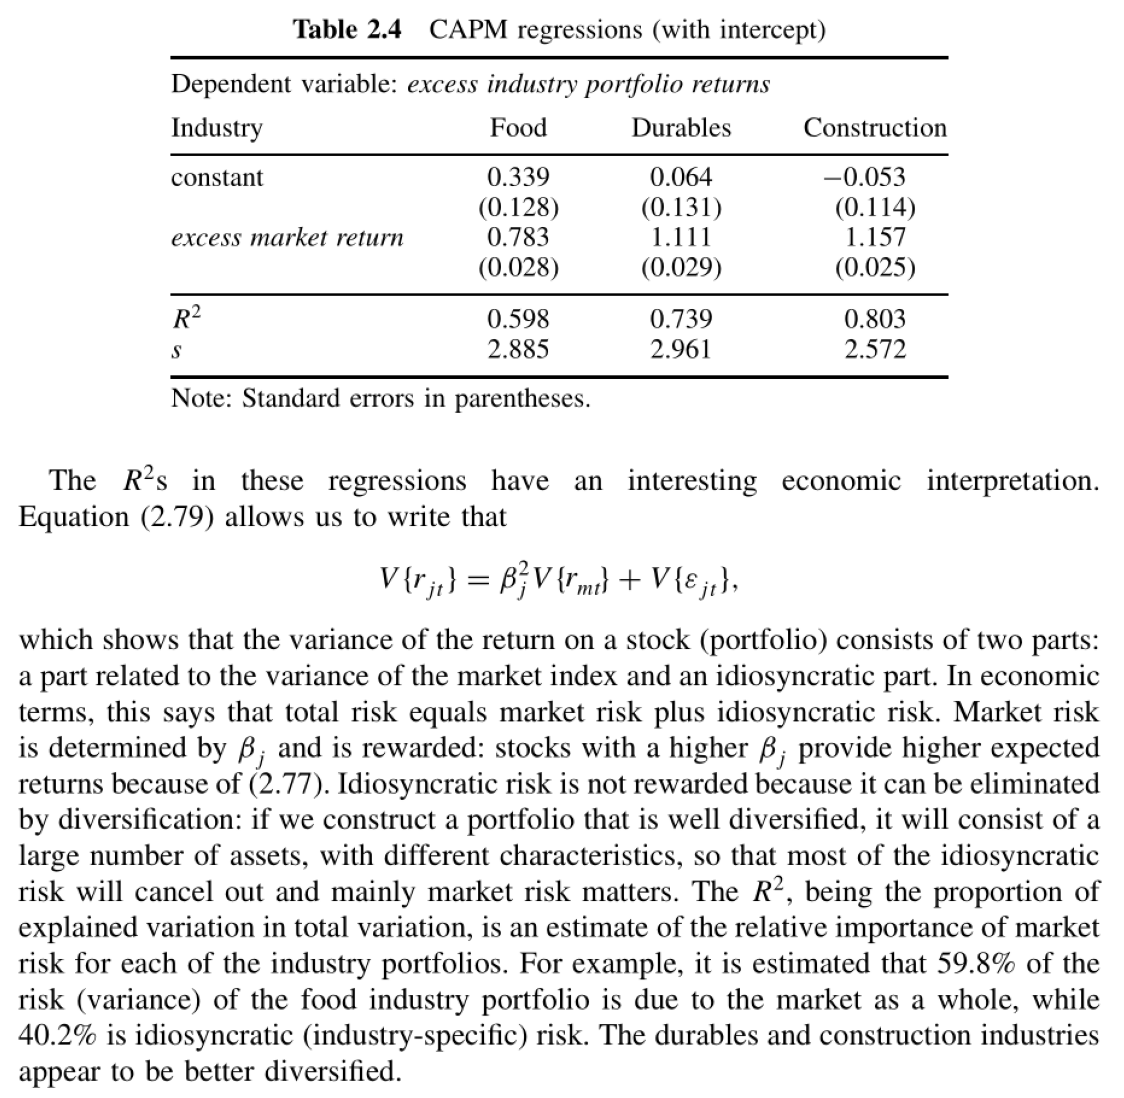

In [61]:
#*** A Guide to Modern Econometrics
#*** by Marno Verbeek
#*** 2.7 Illustration: The Capital Asset Pricing Model
img1 = mpimg.imread('CAPM.PNG')
img2 = mpimg.imread('CAPM_R2.PNG')
plt.figure(figsize=(15,14))
plt.imshow(img1)
plt.axis('off')
plt.figure(figsize=(20,14))
plt.imshow(img2)
plt.axis('off')

In [62]:
# you may choose other tickers to estimate CAPMs

tickers = si.tickers_nasdaq(include_company_data = True)
print('\n', tickers[:30])

tickers = si.tickers_sp500(include_company_data = True)
print('\n', tickers[:30])

tickers = si.tickers_other(include_company_data = True)
print('\n', tickers[:30])

tickers = si.get_undervalued_large_caps()
print('\n', tickers[:30])

C:\Users\mixas\anaconda3\Lib\socket.py:777: ResourceWarning: unclosed <socket.socket fd=5684, family=2, type=1, proto=0, laddr=('192.168.1.67', 59871), raddr=('198.55.199.49', 21)>
  self._sock = None



    Symbol                                      Security Name Market Category  \
0    AACG  ATA Creativity Global - American Depositary Sh...               G   
1    AACI          Armada Acquisition Corp. I - Common Stock               G   
2   AACIU                  Armada Acquisition Corp. I - Unit               G   
3   AACIW               Armada Acquisition Corp. I - Warrant               G   
4    AADI               Aadi Bioscience, Inc. - Common Stock               S   
5    AADR                AdvisorShares Dorsey Wright ADR ETF               G   
6    AAGR   African Agriculture Holdings Inc. - Common Stock               G   
7   AAGRW        African Agriculture Holdings Inc. - Warrant               G   
8     AAL       American Airlines Group, Inc. - Common Stock               Q   
9    AAME       Atlantic American Corporation - Common Stock               G   
10   AAOI       Applied Optoelectronics, Inc. - Common Stock               G   
11   AAON                          AAO

C:\Users\mixas\anaconda3\Lib\socket.py:777: ResourceWarning: unclosed <socket.socket fd=5940, family=2, type=1, proto=0, laddr=('192.168.1.67', 59874), raddr=('198.55.199.49', 21)>
  self._sock = None



    ACT Symbol                                      Security Name Exchange  \
0           A            Agilent Technologies, Inc. Common Stock        N   
1          AA                    Alcoa Corporation Common Stock         N   
2         AAA     Alternative Access First Priority CLO Bond ETF        P   
3        AAAU             Goldman Sachs Physical Gold ETF Shares        Z   
4        AACT  Ares Acquisition Corporation II Class A Ordina...        N   
5      AACT.U  Ares Acquisition Corporation II Units, each co...        N   
6      AACT.W  Ares Acquisition Corporation II Redeemable War...        N   
7        AAMC               Altisource Asset Management Corp Com        A   
8         AAN        Aarons Holdings Company, Inc. Common Stock         N   
9         AAP                            Advance Auto Parts Inc.        N   
10       AAPR  SHL Telemedicine Ltd Innovator Equity Defined ...        Z   
11       AAPX  ETF Opportunities Trust T-Rex 2X Long Apple Da...        Z 

ValueError: No tables found